In [2]:
include("LineFracGen.jl")
include("PointGenerator.jl")
using Winston

In [3]:
function fracsweep(segments, stepsize, iterations, path = pwd()*"\\plot")
    #saves plots at 'path' of all unique line fractals with given inputs
    
    #initialize
    points = genpoints(segments, stepsize) #all possible sequences of points
    currentpoint = zeros(segments, 2) #the current point
    currentpoint[segments,1] = 1 #last point is always 1,0   
    
    duplicate = false #flag for exiting loop after duplicate points
    zer = zeros(Float64, segments) #zero vector for comparison
    plottedpoints = Tuple[] #list of all plotted points  
    
    #find number of possibilities
    sizes = [size(points[i])[1] for i = 1:segments] #array of the number of possible points in each segment    
    prodsizes = cumprod(sizes)
    if minimum(prodsizes) <= 0 #Int overflow
        error("possible combinations exceed typemax(Int).")
    end
    numperm = maximum(prodsizes) #worst case scenario number of combinations
    sizehint!(plottedpoints, round(Int, numperm/10)) #hint at how many possibilities will be valid

    #loop through all data points
    for i = 1:numperm #every combination
        
        #fill data points
        for j = 2:segments-2 #first and last are always fixed. 2nd to last is remainder
            currentpoint[j,:] = points[j][mod1(ceil(Integer, i/numperm*prodsizes[j]), sizes[j]), :] #load point
            if round(currentpoint[j,:],4) == round(currentpoint[j-1,:],4) #duplicate point
                duplicate = true
                break
            end
        end
        
        currentpoint[end-1,:] = points[end-1][mod1(i,sizes[end-1]), :] #2nd to last point
        
        #check constraints
        if round(currentpoint[end-2,:],4) == round(currentpoint[end-1,:],4) #check 2nd and 3rd to last for duplicates
            duplicate = true
        end
        
        if round(currentpoint[end-1,:],4) == [1.0 0.0] #2nd to last point is duplicate of last point
            duplicate = true
        end

        if duplicate == true #no duplicates from above
            duplicate = false
            continue
        end
          
        if !isvaliddist(currentpoint) #distance
            continue
        end
        
        if round(currentpoint[:,2],4) == zer #all y components zero
            continue
        end
            
        if currentpoint[2,2] > 0 #second point is above x-axis
            break #since loop goes through points in increasing y order
        end
        
        if currentpoint[findfirst(currentpoint[:,2]),2] > 0 #first non-zero y value is positive
            continue
        end
        
        if in(tuple(round(flipdim(currentpoint.*[-1 1].+[1 0],1),4)), plottedpoints) #mirror symmetry. rounding required to compare floats
            continue
        end

        if in(tuple(round(flipdim(currentpoint.*[-1 -1].+[1 0],1),4)), plottedpoints) #rotation symmetry. rounding required to compare floats
            continue
        end
        
        #plot and save point
        push!(plottedpoints, tuple(copy(round(currentpoint,4))))
        fracplot(frac(currentpoint,iterations),string(i),string(round(currentpoint,3)),path)
        
    end

end

fracsweep (generic function with 2 methods)

In [4]:
function isvaliddist(data, dist = 1)
    #returns true if distance between each point is < 'dist'
    #data is of form [x1 y1;x2 y2...]
    
    for i = 2:size(data,1)-2 #i=2 and i=size(data,1)-1 are guaranteed to be valid by point generation
        actualdistsq = (data[i,1]-data[i+1,1])^2 + (data[i,2]-data[i+1,2])^2
        if actualdistsq >= dist^2
            return false #a segment is too long
        end
    end
    
    return true #all segments pass
end

isvaliddist (generic function with 2 methods)

In [5]:
function fracplot(data, filename, label, path)
    p=plot(data[:,1],data[:,2])
    label = replace(label,"\n",";") #format so it might fit on one line
    title(label) 
    savefig(p, path*"\\"*filename*".png", width =512, height = 512)
end

fracplot (generic function with 1 method)

In [30]:
fracsweep(5, .2, 7, "C:\\Plots")

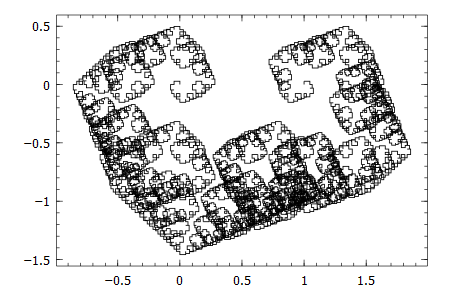

In [26]:
points = frac([0 0;0 -.6;.6 -.6;1 -.6;1 0],7)
plot(points[:,1], points[:,2])